# Skyrmion in a disk

In [1]:
import oommfc as oc
import discretisedfield as df

In [2]:
mesh = oc.Mesh(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 5e-9), cell=(5e-9, 5e-9, 5e-9))

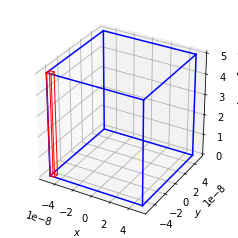

In [3]:
%matplotlib inline
mesh

In [4]:
system = oc.System(name="skyrmion")
# material parameters for FeGe
A_FeGe = 8.78e-12  # exchange stiffness in J/m
D_FeGe = 1.58e-3   # DMI constant in J/m^2
K = 0.51e6         # anisotropy constant (somewhat arbitrary) in J/m
Ms = 1.1e6         # saturation magnetization in A/m
system.hamiltonian = oc.Exchange(A=A_FeGe) + oc.DMI(D=D_FeGe, kind='bulk') + \
                     oc.UniaxialAnisotropy(K1=K, u=(0, 0, 1)) + oc.Demag()
system.hamiltonian

Exchange(A=8.78e-12, name="exchange") + DMI(D=0.00158, kind="bulk", name="dmi") + UniaxialAnisotropy(K1=510000.0, K2=0, u=(0, 0, 1), name="uniaxialanisotropy") + Demag(name="demag")

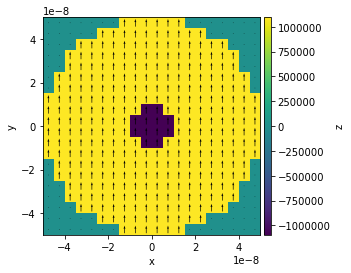

In [5]:
R = 50e-9

def Ms_fun(pos):
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 50e-9:
        return Ms
    else:
        return 0

def m_init(pos):
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0.1, -1)
    else:
        return (0, 0.1, 1)

system.m = df.Field(mesh, value=m_init, norm=Ms_fun)

system.m.plot_plane('z')

In [6]:
# call OOMMF
md = oc.MinDriver()
md.drive(system)

2017/7/19 15:50: Calling OOMMF (skyrmion/skyrmion.mif) ... [3.2s]


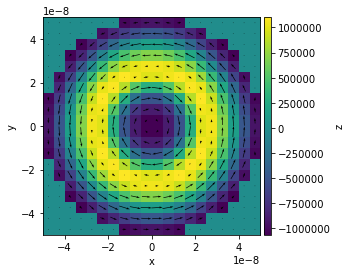

In [7]:
# plot the result and save as png (generic matplotlib code)
import matplotlib.pyplot as plt
system.m.plot_plane('z')
plt.savefig('skyrmion.png', dpi=300)

In [8]:
# some options to write out data
# vtk files can be imported in ParaView
system.m.write('skyrmion.vtk')
# the array returned here is a numpy array, see also numpy documentation for further options
import numpy as np
m_array = system.m.array
np.save('skyrmion.npy', m_array)

In [9]:
# the data from the plot is analysed along a line from -49 to +49 nm using 20 datapoints
# (n=20 corresponds to the 20 discretization cells available)
coordinates_magnetization = list(system.m.line(p1=(-49e-9, 0, 0), p2=(49e-9, 0, 0), n=20))
coordinates, magnetization = list(zip(*coordinates_magnetization))

x, y, z = list(zip(*coordinates))
mx, my, mz = list(zip(*magnetization))
mz_norm = np.array(mz)/Ms

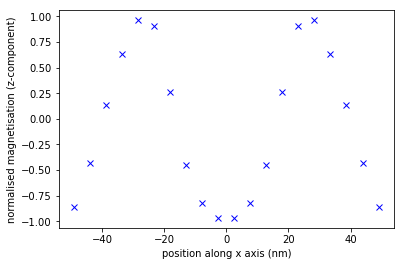

In [10]:
# the magnetization profile along the x-axis is plotted
plt.plot(np.array(x)/1e-9, mz_norm, 'bx')
plt.xlabel('position along x axis (nm)')
plt.ylabel('normalised magnetisation (z-component)')